In [1]:
# Import TensorFlow and hub
import tensorflow as tf
import tensorflow_hub as hub

# Plotting
import matplotlib.pyplot as plt

# some important packages
import os
import re
import numpy as np
import pandas as pd

# scikit-learn
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

In [2]:
model_url = "https://tfhub.dev/google/universal-sentence-encoder/4"

model = hub.load(model_url)
print('Model Loaded')

Model Loaded


In [3]:
def embed(texts):
    return model(texts)

In [4]:
embed(['This movie was great!'])

<tf.Tensor: shape=(1, 512), dtype=float32, numpy=
array([[ 0.00549279,  0.02886906, -0.02628897,  0.04502158, -0.01233335,
         0.02568329, -0.00071882, -0.05447304,  0.04221928, -0.0191371 ,
         0.02710011, -0.04328045, -0.02486858,  0.0135952 ,  0.00482793,
        -0.05379638,  0.01630707,  0.02139907,  0.02644024, -0.02320251,
         0.06569218, -0.10137626, -0.01691998,  0.02492482,  0.02406815,
        -0.03139618, -0.03265484, -0.05174927, -0.0727149 ,  0.10145196,
         0.03868447,  0.04380691, -0.02071748, -0.01873296, -0.03071439,
         0.01825575,  0.03627162,  0.01321464,  0.0094349 , -0.03006625,
         0.06655685,  0.01529936, -0.10101432, -0.00671943, -0.01578641,
         0.04991001,  0.02548564,  0.05454975, -0.01658573,  0.05624885,
         0.038345  , -0.08679942, -0.06096426, -0.01161775,  0.01997448,
         0.04206816, -0.04119828, -0.00768586, -0.05101158,  0.01210047,
        -0.01673209, -0.01382073,  0.00373702,  0.04911597, -0.03481682,
 

In [5]:
df = pd.read_csv("IMDB_Dataset_NEW_.csv", engine="python")
df.head()

,Name of movie,Year of relase,Watchtime,Genre,Certification,Movie Rating,Metascore,Votes,Gross collection,Description,Director,Stars
0,The Shawshank Redemption,1994,142,Drama,R,9.3,82.0,2807755,$28.34M,"Over the course of several years, two convicts...",Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi..."
1,The Godfather,1972,175,"Crime, Drama",R,9.2,100.0,1956642,$134.97M,"Don Vito Corleone, head of a mafia family, dec...",Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke..."
2,Ramayana: The Legend of Prince Rama,1993,135,"Animation, Action, Adventure",PG,9.2,NaN,13043,NaN,An anime adaptation of the Hindu epic the Rama...,"Ram Mohan, Yûgô Sakô, Koichi Saski","Arun Govil, Nikhil Kapoor, Edie Mirman, Rael P..."
3,The Chaos Class,1975,87,"Comedy, Drama",NaN,9.2,NaN,42252,NaN,"Lazy, uneducated students share a very close b...",Ertem Egilmez,"Kemal Sunal, Münir Özkul, Halit Akçatepe, Tari..."
4,The Dark Knight,2008,152,"Action, Crime, Drama",PG-13,9.0,84.0,2789502,$534.86M,When the menace known as the Joker wreaks havo...,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M..."


In [6]:
df = df[["Name of movie", "Description"]]
df.head()


,Name of movie,Description
0,The Shawshank Redemption,"Over the course of several years, two convicts..."
1,The Godfather,"Don Vito Corleone, head of a mafia family, dec..."
2,Ramayana: The Legend of Prince Rama,An anime adaptation of the Hindu epic the Rama...
3,The Chaos Class,"Lazy, uneducated students share a very close b..."
4,The Dark Knight,When the menace known as the Joker wreaks havo...


In [7]:
titles = list(df['Description'])
titles1 = list(df['Name of movie'])

In [8]:
titles[:5]

['Over the course of several years, two convicts form a friendship, seeking consolation and, eventually, redemption through basic compassion.',
 'Don Vito Corleone, head of a mafia family, decides to hand over his empire to his youngest son Michael. However, his decision unintentionally puts the lives of his loved ones in grave danger.',
 'An anime adaptation of the Hindu epic the Ramayana, where Lord Ram combats the wicked king Ravana.',
 'Lazy, uneducated students share a very close bond. They live together in the dormitory, where they plan their latest pranks. When a new headmaster arrives, the students naturally try to overthrow him. A comic war of nitwits follows.',
 'When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.']

In [9]:
embeddings = embed(titles)
embeddings1 = embed(titles1)
print('The embedding shape is:', embeddings.shape)

The embedding shape is: (10001, 512)


In [10]:
pca = PCA(n_components=2)
emb_2d = pca.fit_transform(embeddings)

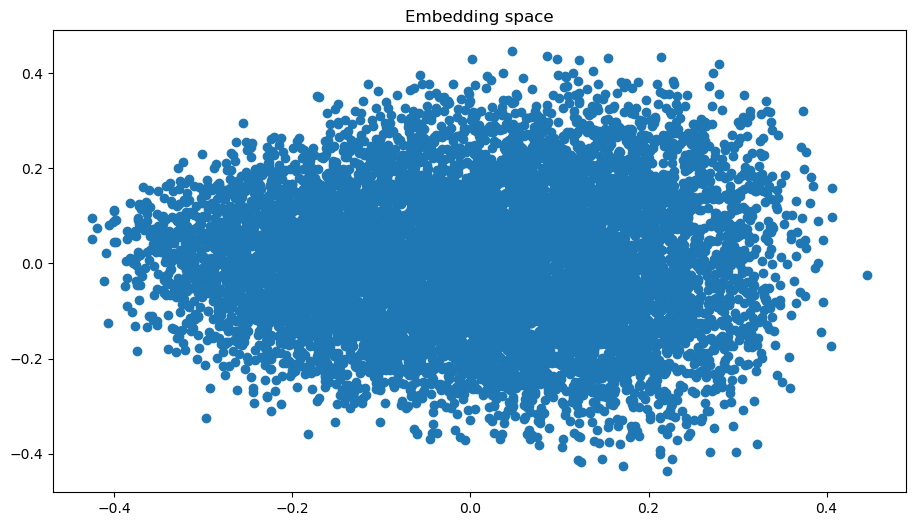

In [11]:
plt.figure(figsize=(11, 6))
plt.title('Embedding space')
plt.scatter(emb_2d[:, 0], emb_2d[:, 1])
plt.show()

In [12]:
nn = NearestNeighbors(n_neighbors=15)
nn.fit(embeddings)

NearestNeighbors(n_neighbors=15)

In [13]:
def recommend(text):
    emb = embed([text])
    neighbors = nn.kneighbors(emb, return_distance=False)[0]
    return df['Name of movie'].iloc[neighbors].tolist()


In [14]:
print('Recommended Movies:')
Rec=recommend("Iron Man")

Recommended Movies:


In [15]:
Rec

['Captain America: Civil War',
 'Iron Man 2',
 'Avengers: Age of Ultron',
 'Iron Man',
 'Ant-Man and the Wasp',
 'Spider-Man: Far from Home',
 'Captain America: The Winter Soldier',
 'Captain America: The First Avenger',
 'Avengers: Endgame',
 'Kick-Ass',
 'Avengers: Infinity War',
 'Blue Beetle',
 'Superman III',
 'The Avengers',
 'Krrish']

In [16]:
import pickle
pickle.dump(df, open("Name of movie.pkl", "wb"))
pickle.dump(embeddings, open("embeddings.pkl", "wb"))
pickle.dump(embeddings1, open("embeddings1.pkl", "wb"))

In [17]:
def recommend1(movie):
    l=[]
    index1=df[df['Name of movie'] == movie].index[0]
    k = np.array(embeddings1[index1]).tolist()
    l.append(k)
    
    nn = NearestNeighbors(n_neighbors=10)
    nn.fit(embeddings)
    neighbors = nn.kneighbors(l, return_distance=False)[0]
    ki1= df['Name of movie'].iloc[neighbors].tolist()
    return ki1

In [18]:
recommend1('Iron Man')

['Captain America: Civil War',
 'Iron Man 2',
 'Avengers: Age of Ultron',
 'Iron Man',
 'Ant-Man and the Wasp',
 'Spider-Man: Far from Home',
 'Captain America: The Winter Soldier',
 'Captain America: The First Avenger',
 'Avengers: Endgame',
 'Kick-Ass']

In [19]:
def recommend(movie):
    l=[]
    
    index1=movies[movies['Name of movie'] == movie].index[0]
    k = np.array(embeddings1[index1]).tolist()
    l.append(k)
    nn = NearestNeighbors(n_neighbors=10)
    nn.fit(embeddings1)
    neighbors = nn.kneighbors(l, return_distance=False)[0]
    ki1= movies['Name of movie'].iloc[neighbors].tolist()
    return ki1

In [26]:
df1 = pd.read_csv("Link.csv", engine="python")
df1.head()

,Name of movie,Link
0,The Shawshank Redemption,https://m.media-amazon.com/images/M/MV5BNDE3OD...
1,The Godfather,https://m.media-amazon.com/images/M/MV5BM2MyNj...
2,Ramayana: The Legend of Prince Rama,https://m.media-amazon.com/images/M/MV5BNTJjZT...
3,Hababam Sinifi,https://m.media-amazon.com/images/M/MV5BMGRjOG...
4,The Dark Knight,https://m.media-amazon.com/images/M/MV5BMTMxNT...


In [21]:
kf=df1['Link']
kf

0        https://m.media-amazon.com/images/M/MV5BNDE3OD...
1        https://m.media-amazon.com/images/M/MV5BM2MyNj...
2        https://m.media-amazon.com/images/M/MV5BNTJjZT...
3        https://m.media-amazon.com/images/M/MV5BMGRjOG...
4        https://m.media-amazon.com/images/M/MV5BMTMxNT...
                               ...                        
10000    https://m.media-amazon.com/images/M/MV5BZThhM2...
10001    https://m.media-amazon.com/images/M/MV5BM2QxMW...
10002    https://m.media-amazon.com/images/M/MV5BMTUyND...
10003    https://m.media-amazon.com/images/M/MV5BMjUzMD...
10004    https://m.media-amazon.com/images/M/MV5BOWU5MD...
Name: Link, Length: 10005, dtype: object

In [22]:
import pickle
pickle.dump(df1, open("Link.csv.pkl", "wb"))

In [23]:
li=[]
k=df1[df1['Name of movie']=='The Godfather']['Link']
li=k.tolist()
li[0]


'https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_UY98_CR1,0,67,98_AL_.jpg'

In [29]:
%%writefile kk1.py
import pickle
import numpy as np
import streamlit as st
import requests
from sklearn.neighbors import NearestNeighbors
st.set_page_config(layout="wide")
def recommend(movie):
    l=[]
    index1=movies[movies['Name of movie'] == movie].index[0]
    k = np.array(embeddings1[index1]).tolist()
    l.append(k)
    nn = NearestNeighbors(n_neighbors=10)
    nn.fit(embeddings)
    neighbors = nn.kneighbors(l, return_distance=False)[0]
    ki1= movies['Name of movie'].iloc[neighbors].tolist()
    return ki1

st.header('Movie Recommender System')
movies = pickle.load(open('Name of movie.pkl','rb'))
embeddings= pickle.load(open('embeddings.pkl','rb'))
embeddings1= pickle.load(open('embeddings1.pkl','rb'))
Link= pickle.load(open('Link.pkl','rb'))
movie_list = movies['Name of movie'].values
selected_movie = st.selectbox(
    "Type or select a movie from the dropdown",
    movie_list
)

def img(value):
    lis1=[]
    lis=Link[Link['Name of movie']==value]['Link']
    lis1=lis.tolist()
    if len(lis1)>1:
        return lis1[0]
    else:
        return lis1
    

if st.button('Show Recommendation'):
    ki = recommend(selected_movie)
    col1, col2, col3, col4, col5,col6, col7, col8, col9, col10 = st.columns(10)
    with col1:
        st.image(img(ki[0]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[0]}**")
    with col2:
       
        st.image(img(ki[1]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[1]}**")
    with col3:
        st.image(img(ki[2]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[2]}**")
        
    with col4:
        st.image(img(ki[3]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[3]}**")
        
    with col5:
        st.image(img(ki[4]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[4]}**")
    with col6:
        st.image(img(ki[5]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[5]}**")
    with col7:
       
        st.image(img(ki[6]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[6]}**")
    with col8:
        st.image(img(ki[7]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[7]}**")
        
    with col9:
        st.image(img(ki[8]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[8]}**")
        
    with col10:
        st.image(img(ki[9]), width=120, use_column_width=120, clamp=False, channels="RGB", output_format="auto")
        st.write(f"**{ki[9]}**")
       







Overwriting kk1.py


In [30]:
!streamlit run kk1.py

^C
